0. Follow all the steps on the github page to setup MILAN
1. Place the imagenet dataset folder with the name imagenet1000 inside the data folder
2. Run the following script either inside this notebook or in the command line (in cmd without the !):

<code>!python3 -m scripts.compute_exemplars vit16 imagenet1000 --units 100 --device cuda</code>

3. The above script computes the top activating images and writes them inside the results folder. I had to manually move the ./results/exemplars/vit16 folder inside the data folder to be able to run the next script which gives descriptions to the neurons. According to MILAN this should have happened automatically though.

<code>!python3 -m scripts.compute_milan_descriptions vit16 imagenet1000 --device cuda</code>

4. The descriptions should now be written inside a CSV in the ./results/descriptions folder.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv

# Number of images per row
images_per_row = 5

# Function to display images with caption
def display_images(images, caption, images_per_row):
    num_images = len(images)
    num_rows = (num_images - 1) // images_per_row + 1

    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(20, 5 * num_rows))
    fig.suptitle(caption, fontsize=30)

    for i in range(num_rows):
        for j in range(images_per_row):
            index = i * images_per_row + j
            if index < num_images:
                img = mpimg.imread(images[index])
                axes[i, j].imshow(img)
                axes[i, j].axis('off')
            else:
                axes[i, j].axis('off')

    plt.show()

In [3]:
annotations = {}
with open('./results/descriptions/vit16_imagenet1000.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        annotations[f"{row[0]}_unit_{row[1]}"] = row[2]


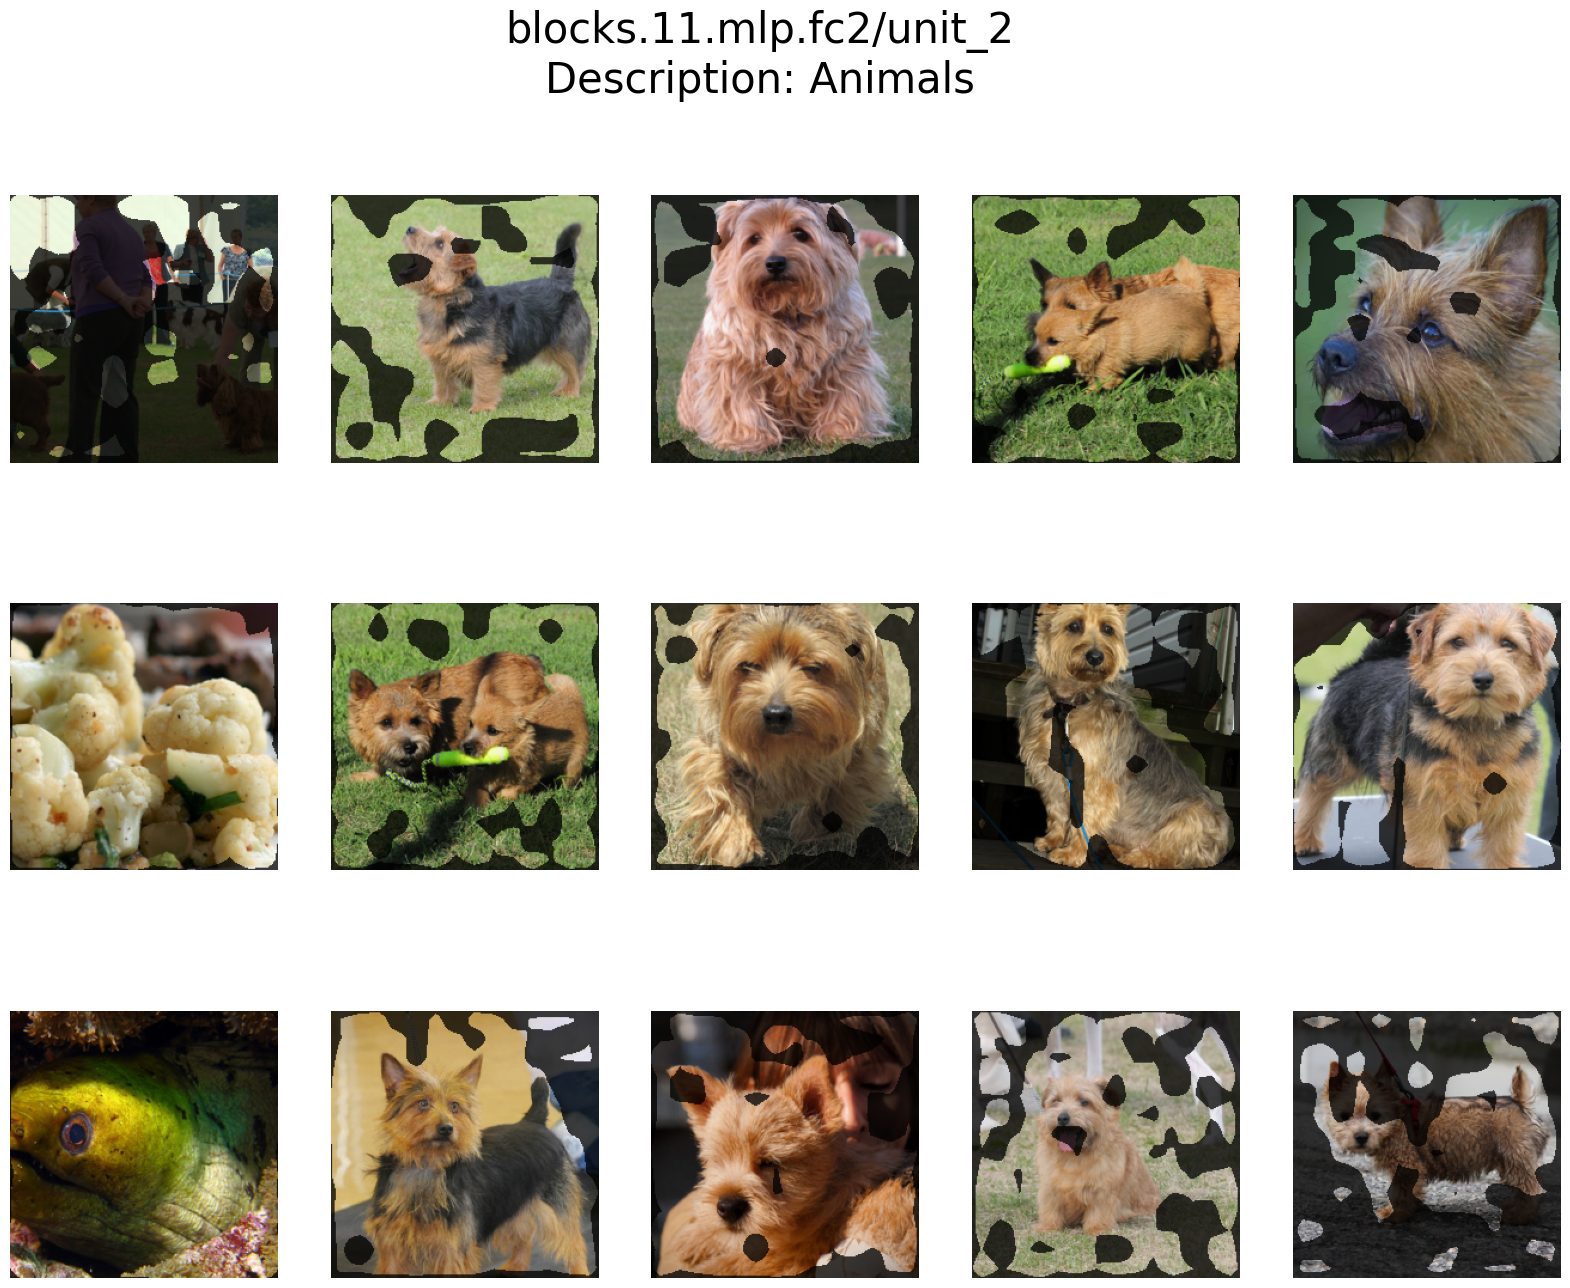

In [4]:
block = 11
unit = 2
description = annotations[f"blocks.{block}.mlp.fc2_unit_{unit}"]

images = rf"./results/exemplars/viz/vit16/imagenet1000/blocks.{block}.mlp.fc2/unit_{unit}"

arr = os.listdir(images)
arr.pop(0)
arr = [images + f"/{image}" for image in arr]

# Caption for the images
caption = f'blocks.{str(block)}.mlp.fc2/unit_{str(unit)}\nDescription: {description}'
# Display the images with 5 images per row
display_images(arr, caption, images_per_row)
